In [15]:
import ast
import sys

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import PIL.Image
import torch
import torch.nn.functional as F # type: ignore

sys.path.insert(0, '..')

In [16]:
from pytorch_image_classification import (
    get_default_config,
    create_model,
    create_transform,
)

In [17]:
config = get_default_config()
config.merge_from_file('../configs/self_dataset/resnet.yaml')

In [18]:
device = torch.device(config.device)

model = create_model(config)
# checkpoint = torch.load(
#     '../experiments/imagenet/resnet18/exp00/checkpoint_00090.pth')

#model.load_state_dict(checkpoint['model'])
model.to(device)
_ = model.eval()

In [19]:
transform = create_transform(config, is_train=True)

In [20]:
%%capture
!wget https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt

In [21]:
with open('imagenet1000_clsidx_to_labels.txt') as f:
    index2label = ast.literal_eval(f.read())

In [22]:
%%capture
!wget https://images.pexels.com/photos/2071873/pexels-photo-2071873.jpeg

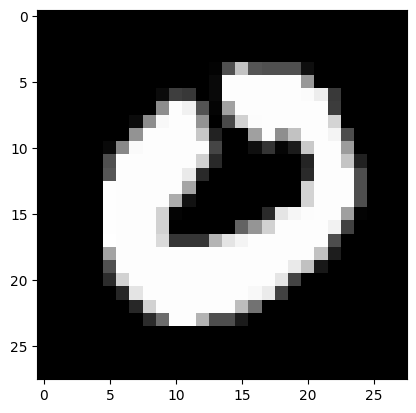

In [23]:
image = cv2.imread('/remote-home/qwb/zym/AI_S/torch_classification/data/test/0/3.png')
plt.imshow(image[:, :, ::-1])
plt.show()

In [27]:
data = transform(PIL.Image.fromarray(image))
with torch.no_grad():
    pred = model(data.unsqueeze(0).to(device))
prob = F.softmax(pred, dim=1).cpu()

scores, indices = prob.topk(k=3)
scores = scores.numpy().ravel()

indices = indices.numpy().ravel()
#names = [index2label[index] for index in indices]
pd.DataFrame({'label': indices, 'score': scores})

,label,score
0,1,1.0
1,0,0.0
2,2,0.0
